# Downloading Packages

In [168]:
# !pip install plotly
# !pip install chart_studio

# Imports

In [169]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#plotting
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#For Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

#Linear regression
from sklearn.linear_model import LinearRegression

#LSTM Model
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


# Read data

In [170]:
data=pd.read_csv("Bombay iron & steel.csv")

# Explore data

In [171]:
data.head()

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
0,10/5/2009,1.00,1.00,1.00,1.00,1.00,50,1,50,50.0,100.0,0.0,0.0
1,2/1/2000,1.05,1.05,1.05,1.05,1.05,150,1,157,NaN,NaN,0.0,0.0
2,12/27/1999,1.00,1.00,1.00,1.00,1.00,200,1,200,NaN,NaN,0.0,0.0
3,9/3/1999,1.40,1.40,1.40,1.40,1.40,100,1,140,NaN,NaN,0.0,0.0
4,8/13/1999,1.45,1.45,1.45,1.45,1.44,50,1,72,NaN,NaN,0.0,0.0


In [172]:
data.tail()

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
444,1/14/1991,12.5,15.0,12.5,15.0,0.0,0,0,0,NaN,NaN,2.5,2.5
445,1/11/1991,12.5,12.5,12.0,12.5,0.0,0,0,0,NaN,NaN,0.5,0.0
446,1/9/1991,12.5,15.0,12.5,15.0,0.0,0,0,0,NaN,NaN,2.5,2.5
447,1/7/1991,12.5,15.0,12.5,15.0,0.0,0,0,0,NaN,NaN,2.5,2.5
448,1/3/1991,15.0,15.0,15.0,15.0,0.0,0,0,0,NaN,NaN,0.0,0.0


In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       449 non-null    object 
 1   Open                       449 non-null    float64
 2   High                       449 non-null    float64
 3   Low                        449 non-null    float64
 4   Close                      449 non-null    float64
 5   WAP                        449 non-null    float64
 6   No. of Shares              449 non-null    int64  
 7   No. of Trades              449 non-null    int64  
 8   Total Turnover             449 non-null    int64  
 9   Deliverable Quantity       1 non-null      float64
 10  % Deli. Qty to Traded Qty  1 non-null      float64
 11  Spread H-L                 449 non-null    float64
 12  Spread C-O                 449 non-null    float64
dtypes: float64(9), int64(3), object(1)
memory usage: 4

In [174]:
data.columns=['Date', 'Open', 'High', 'Low', 'Close', 'WAP', 'Shares',
       'Trades', 'Total Turnover', 'Deliverable Quantity',
       '% Deli. Qty to Traded Qty', 'Spread H-L', 'Spread C-O']

# Cleaning data

## Converting data column into date format

In [175]:
data['Date']=pd.to_datetime(data['Date'])
data.head(3)

,Date,Open,High,Low,Close,WAP,Shares,Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
0,2009-10-05,1.00,1.00,1.00,1.00,1.00,50,1,50,50.0,100.0,0.0,0.0
1,2000-02-01,1.05,1.05,1.05,1.05,1.05,150,1,157,NaN,NaN,0.0,0.0
2,1999-12-27,1.00,1.00,1.00,1.00,1.00,200,1,200,NaN,NaN,0.0,0.0


## Drop unnecessary columns


In [176]:
data=data.drop(['WAP', 'Shares',
       'Trades', 'Total Turnover', 'Deliverable Quantity','% Deli. Qty to Traded Qty','Spread H-L', 'Spread C-O'], axis = 1)

In [177]:
data


,Date,Open,High,Low,Close
0,2009-10-05,1.00,1.00,1.00,1.00
1,2000-02-01,1.05,1.05,1.05,1.05
2,1999-12-27,1.00,1.00,1.00,1.00
3,1999-09-03,1.40,1.40,1.40,1.40
4,1999-08-13,1.45,1.45,1.45,1.45
...,...,...,...,...,...
444,1991-01-14,12.50,15.00,12.50,15.00
445,1991-01-11,12.50,12.50,12.00,12.50
446,1991-01-09,12.50,15.00,12.50,15.00
447,1991-01-07,12.50,15.00,12.50,15.00


## Check for duplicates

In [178]:
data.duplicated().sum()

0

## Describe data

In [179]:
data.describe()

,Open,High,Low,Close
count,449.000000,449.000000,449.000000,449.000000
mean,11.842984,13.235412,11.696102,13.162584
std,6.062365,7.007608,5.823797,6.972521
min,1.000000,1.000000,1.000000,1.000000
25%,7.500000,7.750000,7.500000,7.500000
50%,12.500000,15.000000,12.500000,15.000000
75%,15.000000,17.000000,15.000000,17.000000
max,45.000000,50.000000,45.000000,50.000000


## Box plotting

<AxesSubplot:>

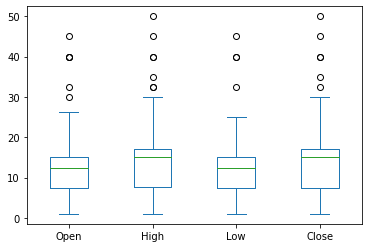

In [180]:
data[['Open','High','Low','Close']].plot(kind='box')

The box plot show there are outliers in data

## Check by skewness

In [181]:
data.skew()

C:\Users\Dalia\AppData\Local\Temp/ipykernel_30208/1188251951.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Open     0.994938
High     0.746061
Low      0.848786
Close    0.750701
dtype: float64

According to skewness there is no outliers

## Plotting Closing Price

In [182]:
layout=go.Layout(
    title='Stock Prices of Bombay Iron & Steel',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            size=14
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            size=14
        )
    )
)
Bombay_data=[{'x':data['Date'], 'y':data['Close']}]
plot=go.Figure(data=Bombay_data,layout=layout)

iplot(plot)

# Train Test Split

In [183]:
def split(data):
    X=np.array(data.index).reshape(-1,1)
    Y=data['Close']
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=101)
    return X_train,X_test,Y_train,Y_test

In [184]:
X_train,X_test,Y_train,Y_test=split(data)

# Feature Scaling

In [185]:
scaler=StandardScaler().fit(X_train)

# Linear Regression Model

In [186]:
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

## Plot Actual and Predicted Price

In [187]:
trace1=go.Scatter(
    x=X_train.T[0],
    y=Y_train,
    mode='markers',
    name="Actual"
)
trace2=go.Scatter(
    x=X_train.T[0],
    y=lm.predict(X_train).T,
    mode='lines',
    name="Predicted"
)
Bombay_data=[trace1,trace2]
layout.xaxis.title.text='Day'
plot2=go.Figure(data=Bombay_data,layout=layout)

iplot(plot2)

## Same Plot but with matplotlip

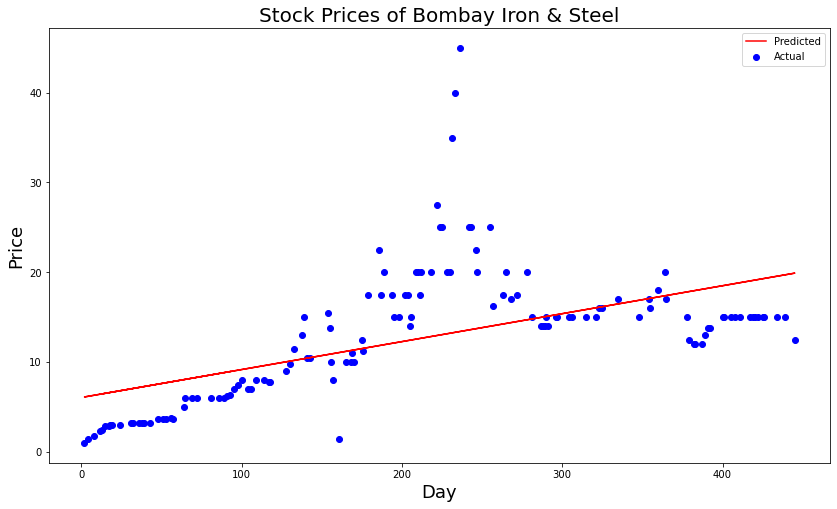

In [242]:
fig, ax=plt.subplots(figsize=(14,8))
ax.scatter(X_test,Y_test,color='b',marker='o')
ax.plot(X_test, lm.predict(X_test),color='r')
ax.set_ylabel("Price",size=18)
ax.set_xlabel("Day",size=18)
ax.set_title('Stock Prices of Bombay Iron & Steel',size=20)
plt.legend(['Predicted','Actual'])
plt.show()

In [189]:
print("MeanSquared error: "+ str(mse(Y_test, lm.predict(X_test))))
print("r2score: " + str(r2_score(Y_test, lm.predict(X_test))*100))

MeanSquared error: 37.45554553685565
r2score: 31.597843459382258


# LSTM Model

## Plotting Close History

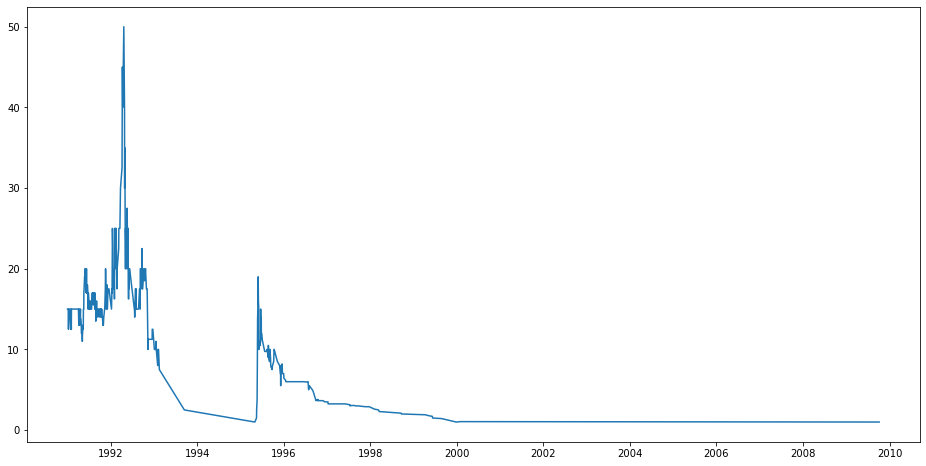

In [311]:
data["Date"]=pd.to_datetime(data.Date,format="%m/%d/%Y")
plt.figure(figsize=(16,8))
plt.plot(data['Date'],data["Close"],label='Close Price history')

## Scaling Data


In [439]:
final_dataset=data.iloc[:,4:5]
train_data=final_dataset[0:350]
test_data=final_dataset[350:]
sc=MinMaxScaler(feature_range=(0,1))
train_data=sc.fit_transform(train_data)
train_data.shape

(350, 1)

## Preparing Training Data

In [440]:
x_train,y_train=[],[]
for i in range(60,len(train_data)):#60 timestep//length of data
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    
x_train,y_train=np.array(x_train),np.array(y_train)

In [441]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(290, 60, 1)

## Building The Model

In [464]:
model=Sequential()

model.add(LSTM(units=10,return_sequences=True,input_shape=(x_train.shape[1],1)))
# model.add(Dropout(0.2))

# model.add(LSTM(units=50,return_sequences=True))
# model.add(Dropout(0.2))

# model.add(LSTM(units=50,return_sequences=True))
# model.add(Dropout(0.2))

model.add(LSTM(units=10))
# model.add(Dropout(0.2))

model.add(Dense(1))
# inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
# inputs_data=inputs_data.reshape(-1,1)
# inputs_data=scaler.transform(inputs_data)
model.compile(loss='mean_squared_error',optimizer='adam')

In [465]:
hist=model.fit(x_train,y_train,epochs=20,batch_size=1,verbose=2)

Epoch 1/20
290/290 - 10s - loss: 0.0120 - 10s/epoch - 34ms/step
Epoch 2/20
290/290 - 7s - loss: 0.0110 - 7s/epoch - 25ms/step
Epoch 3/20
290/290 - 8s - loss: 0.0083 - 8s/epoch - 29ms/step
Epoch 4/20
290/290 - 8s - loss: 0.0084 - 8s/epoch - 29ms/step
Epoch 5/20
290/290 - 8s - loss: 0.0060 - 8s/epoch - 29ms/step
Epoch 6/20
290/290 - 8s - loss: 0.0063 - 8s/epoch - 29ms/step
Epoch 7/20
290/290 - 8s - loss: 0.0049 - 8s/epoch - 29ms/step
Epoch 8/20
290/290 - 11s - loss: 0.0052 - 11s/epoch - 37ms/step
Epoch 9/20
290/290 - 13s - loss: 0.0042 - 13s/epoch - 43ms/step
Epoch 10/20
290/290 - 10s - loss: 0.0046 - 10s/epoch - 34ms/step
Epoch 11/20
290/290 - 9s - loss: 0.0041 - 9s/epoch - 30ms/step
Epoch 12/20
290/290 - 10s - loss: 0.0044 - 10s/epoch - 33ms/step
Epoch 13/20
290/290 - 9s - loss: 0.0036 - 9s/epoch - 32ms/step
Epoch 14/20
290/290 - 10s - loss: 0.0041 - 10s/epoch - 36ms/step
Epoch 15/20
290/290 - 10s - loss: 0.0040 - 10s/epoch - 35ms/step
Epoch 16/20
290/290 - 9s - loss: 0.0037 - 9s/epoch

## PLotting the loss of train

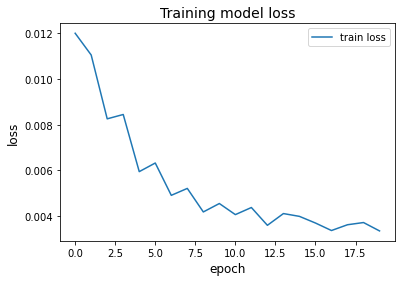

In [466]:
plt.plot(hist.history['loss'])
plt.title('Training model loss',size=14)
plt.ylabel('loss',size=12)
plt.xlabel('epoch',size=12)
plt.legend(['train loss'])
plt.show()

## Preparing Testing Data

In [467]:
y_test=test_data.iloc[60:,0:].values
#Making input array
input_array=test_data.iloc[:,0:].values
input_scaled=sc.transform(input_array)
input_scaled.shape

(99, 1)

In [468]:
x_test=[]
for i in range(60,len(test_data)):#60 timestep//length of data
    x_test.append(input_scaled[i-60:i,0])
    
x_test=np.array(x_test)

In [469]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(39, 60, 1)

In [470]:
y_pred=model.predict(x_test)
y_pred

array([[0.29630494],
       [0.29619172],
       [0.29639673],
       [0.29669392],
       [0.29693827],
       [0.29708427],
       [0.29714704],
       [0.29716045],
       [0.29715365],
       [0.29714337],
       [0.29713613],
       [0.29713264],
       [0.29713148],
       [0.2971312 ],
       [0.297131  ],
       [0.29713053],
       [0.29712987],
       [0.29712915],
       [0.29712856],
       [0.29712805],
       [0.29712772],
       [0.2971275 ],
       [0.29712737],
       [0.29712728],
       [0.29712722],
       [0.29712722],
       [0.29712722],
       [0.29712722],
       [0.29712722],
       [0.27385685],
       [0.2752104 ],
       [0.26348042],
       [0.264287  ],
       [0.27940723],
       [0.29270667],
       [0.29826754],
       [0.27485764],
       [0.27448663],
       [0.28466865]], dtype=float32)

In [471]:
predicted_price=sc.inverse_transform(y_pred)

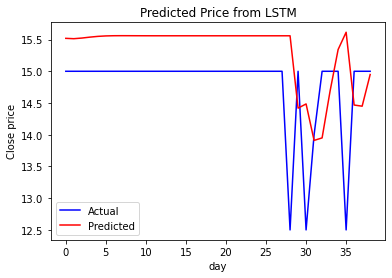

In [473]:
plt.plot(y_test,color='b',label="Actual")
plt.plot(predicted_price,color='r',label='Predicted')
plt.title("Predicted Price from LSTM")
plt.xlabel("day")
plt.ylabel("Close price")
plt.legend()
plt.show()